In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
#from mrcnn.model import log

from samples.boat import boat

from PIL import Image

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = "/path/to/mask_rcnn_balloon.h5"  # TODO: update this path

In [3]:
config = boat.BoatConfig()
BALLOON_DIR = os.path.join(ROOT_DIR, "datasets/boat")


In [4]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_class_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [5]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [6]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [7]:
# Load validation dataset
director = ROOT_DIR;
dataset = boat.BoatDataset()
dataset.load_boat(ROOT_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 15
Classes: ['BG', 'boat']


In [8]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [9]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
weights_path = "C:/Users/Lala Timotei/Mask_RCNN-master/logs/boat20181124T1302/mask_rcnn_boat_0030.h5"

# Or, load the last model you trained
#weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:/Users/Lala Timotei/Mask_RCNN-master/logs/boat20181124T1302/mask_rcnn_boat_0030.h5
Re-starting from epoch 30


12
image ID: boat.2b2e3e3c3.jpg (12) C:\Users\Lala Timotei\Mask_RCNN-master\val\2b2e3e3c3.jpg


C:\Users\Lala Timotei\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\Lala Timotei\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


AttributeError: module 'mrcnn.model' has no attribute 'log'

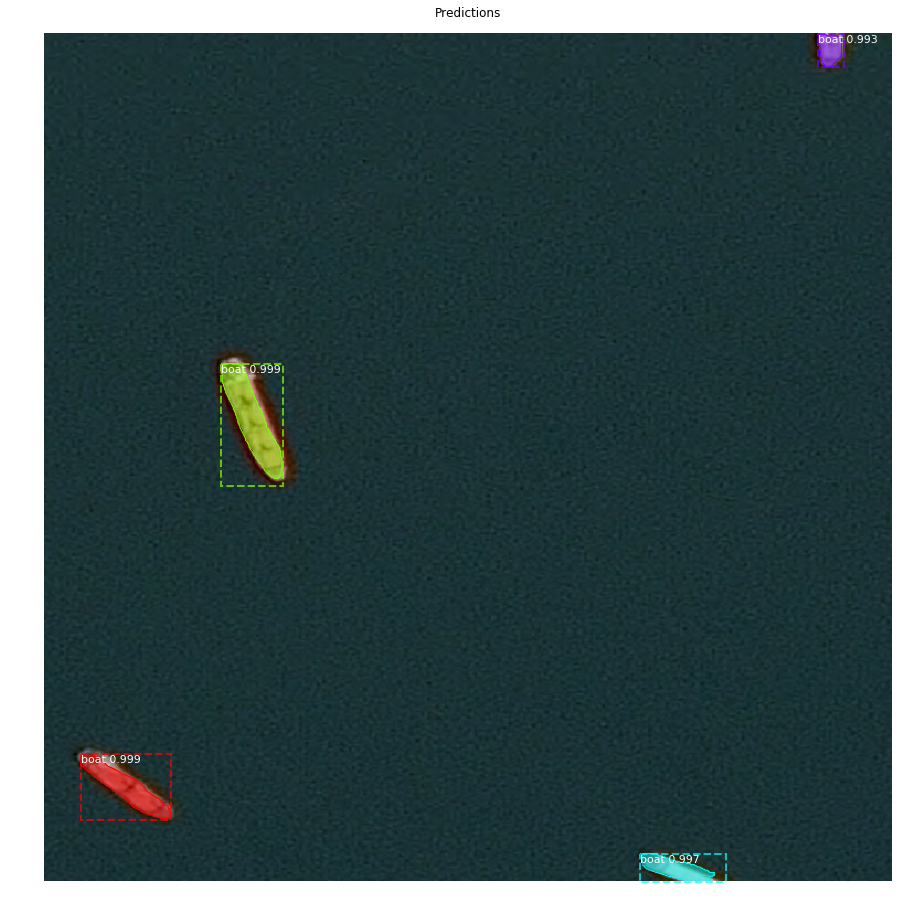

In [16]:
def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image


#image_id = random.choice(dataset.image_ids)
image_id = 12
print(image_id)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

image = np.asarray(Image.open('0f01e20db.jpg', 'r'))
# Run object detection
results = model.detect([image], verbose=0)

# Display results
ax = get_ax(1)
r = results[0]
#Incercare de a afisa masca 
colors = [1, 0.0, 0.0]
masks = r['masks'] #iau toate mastile detectate de algoritmul meu 
mask = masks[:, :, 0]#iau doar prima masca detectata
masked_image = image.astype(np.uint32).copy()
masked_image = apply_mask(masked_image, mask, colors)#aplicam masca pe poza
imgplot = plt.imshow(masked_image)#afisam poza cu tot cu masca
#plt.show()


visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                           title="Predictions")
modellib.log("gt_class_id", gt_class_id)
modellib.log("gt_bbox", gt_bbox)
modellib.log("gt_mask", gt_mask)

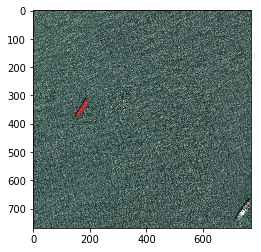

0


In [43]:
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

#axi = plt.subplots(1)
#axi.imshow(masked_image.astype(np.uint8))
imgplot = plt.imshow(masked_image)
plt.show()
mask = mask*1
#print(mask)
rle = ''
for i in range(r['rois'].shape[0]):
    rle = rle + ' ' + rle_encode(mask)
#print(rle_encode(mask))
#print(rle)
print(r['rois'].shape[0])
pixels = '';
for i in range(768):
    for j in range(768):
        if mask[i][j] == True:
            pixels = pixels+str(i)+' '+str(j)+' '

In [13]:
import csv
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)


file = os.path.join(ROOT_DIR, 'val/sample_submission_v2.csv') #get the file of submission
print(file)
df = pd.read_csv(file) #citim fisierul .csv
print(df['ImageId'][0])

lista = [];

for i in range(1612, len(df['ImageId'])-1):
    print(i)
    image = np.asarray(Image.open(df['ImageId'][i], 'r'))
    
    results = model.detect([image], verbose=0)#facem feedforward prin retea cu imaginea de la pasul i
    r = results[0]
        
    rle = ' ' #variabila care va stoca Run Length encoding pentru imaginea de la pasul i
    nr_masti = r['rois'].shape[0] #luam numarul de masti generate de reteaua noastra
    if nr_masti !=0:
        masks = r['masks'] #iau toate mastile detectate de algoritmul meu 
        for j in range(nr_masti):
            mask = masks[:, :, j]#iau mastile pe rand
            mask = mask*1 #transform din Bool in Int
            rle = rle + ' ' + rle_encode(mask) #adaugam toti pixelii mastilor gasiti 
    lista.append({'ImageId': df['ImageId'][i], 'EncodedPixels': rle}) #adaugam la lista finala 
  




    
    



C:\Users\Lala Timotei\Mask_RCNN-master\val/sample_submission_v2.csv
00002bd58.jpg
1612


C:\Users\Lala Timotei\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


1613
1614
1615
1616


KeyboardInterrupt: 

In [49]:
with open(file, 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)
print(lines[1]

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Lala Timotei\\Mask_RCNN-master\\val/sample_submission_v2.csv'

In [137]:
friends = [{'name': 'Joe', 'age': 20}, 
           {'name': 'Adi', 'age': 45}]
friends.append({'name': 'mosie', 'age': 80})
#print(lista)

pd_write = pd.DataFrame(lista)
pd_write = pd_write[['ImageId', 'EncodedPixels']]
pd_write.head()

pd_write.to_csv('submission3.csv', index = False)

In [136]:
len(lista)
print(df['ImageId'][946])
i

0f15716ba.jpg


3088

In [10]:
file = os.path.join(ROOT_DIR, 'val/sample_submission_v2.csv') #get the file of submission
print(file)
df = pd.read_csv(file) #citim fisierul .csv

imagelist = [];
for k in range(1, 10):
    imagea = np.asarray(Image.open(df['ImageId'][k], 'r'))
    imagelist.append(imagea)
for image in imagelist:
    h, w = (768, 768)
    print(w)

resultss = model.detect([imagelist], verbose=1)#facem feedforward prin retea cu imaginea de la pasul i
r = resultss[0]
IN the first 
Emanuel\\
Acest copil este Isus
Dati de veste

C:\Users\Lala Timotei\Mask_RCNN-master\val/sample_submission_v2.csv
768
768
768
768
768
768
768
768
768


C:\Users\Lala Timotei\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


AttributeError: 'list' object has no attribute 'shape'